/home/jack/anaconda3/envs/ee559/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Epoch 1/10


Training: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]


Train Loss: 0.6821


Evaluating: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


Val Loss: 0.6671
Val Accuracy: 61.07%

Epoch 2/10


Training: 100%|██████████| 28/28 [00:27<00:00,  1.01it/s]


Train Loss: 0.5813


Evaluating: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


Val Loss: 0.6458
Val Accuracy: 61.74%

Epoch 3/10


Training: 100%|██████████| 28/28 [00:29<00:00,  1.06s/it]


Train Loss: 0.3888


Evaluating: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


Val Loss: 0.6658
Val Accuracy: 65.77%

Epoch 4/10


Training: 100%|██████████| 28/28 [00:28<00:00,  1.03s/it]


Train Loss: 0.1486


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


Val Loss: 0.7883
Val Accuracy: 59.06%

Epoch 5/10


Training: 100%|██████████| 28/28 [00:28<00:00,  1.04s/it]


Train Loss: 0.0410


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]


Val Loss: 0.9654
Val Accuracy: 63.09%

Epoch 6/10


Training: 100%|██████████| 28/28 [00:29<00:00,  1.06s/it]


Train Loss: 0.0440


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


Val Loss: 1.0115
Val Accuracy: 63.76%

Epoch 7/10


Training: 100%|██████████| 28/28 [00:31<00:00,  1.12s/it]


Train Loss: 0.0349


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


Val Loss: 1.0633
Val Accuracy: 59.73%

Epoch 8/10


Training: 100%|██████████| 28/28 [00:33<00:00,  1.19s/it]


Train Loss: 0.0168


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


Val Loss: 1.3483
Val Accuracy: 54.36%

Epoch 9/10


Training: 100%|██████████| 28/28 [00:34<00:00,  1.22s/it]


Train Loss: 0.0147


Evaluating: 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]


Val Loss: 1.3108
Val Accuracy: 58.39%

Epoch 10/10


Training: 100%|██████████| 28/28 [00:33<00:00,  1.19s/it]


Train Loss: 0.0111


Evaluating: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

Val Loss: 1.3367
Val Accuracy: 59.73%


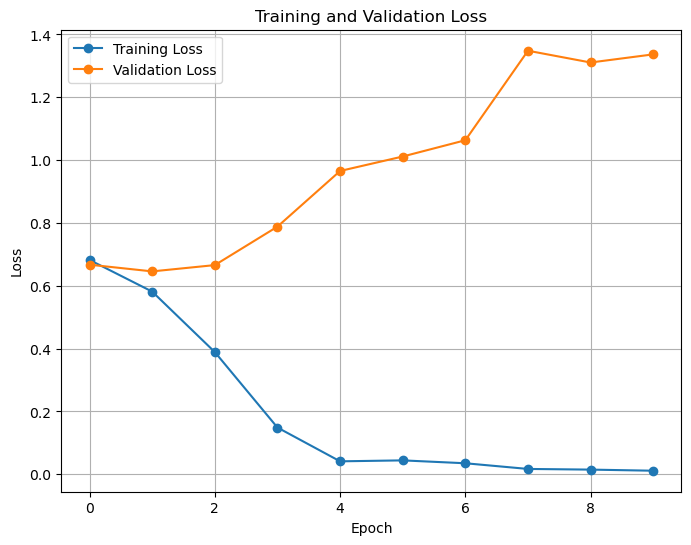

In [1]:
import torch
from torch.utils.data import DataLoader as TorchDataLoader

from DL_vs_HateSpeech.models.model_v0 import ModelV0
from DL_vs_HateSpeech.loading_data.dataloader import DataLoader
from DL_vs_HateSpeech.training.training import (
    collate_fn,
    get_optimizer_and_criterion,
    train_epoch
)
from DL_vs_HateSpeech.evaluation.evaluate import evaluate
from DL_vs_HateSpeech.plots.plot_loss import plot_losses

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
BATCH_SIZE = 16
LR = 1e-5
EPOCHS = 10

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Initialize Model, Optimizer, Loss
model = ModelV0(clip_model_type="32").to(device)
optimizer, criterion = get_optimizer_and_criterion(model, lr=LR)

# Training and evaluation loop
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")

    # Train
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    print(f"Train Loss: {train_loss:.4f}")
    train_losses.append(train_loss)

    # Evaluation loss and accuracy
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
    print(f"Val Loss: {val_loss:.4f}")
    print(f"Val Accuracy: {val_accuracy * 100:.2f}%")
    val_losses.append(val_loss)

# Plot at the end
plot_losses(train_losses, val_losses)
